# Sankey diagram

This file draws a preliminary version of the Sankey diagram for further editing in Adobe Illustrator. The Sankey diagram is designed with floWeaver: https://github.com/ricklupton/floweaver.

In [ ]:
import pandas as pd
import numpy as np
!pip install floweaver ipysankeywidget
from floweaver import *
from ipywidgets import HBox

Import the data.

In [ ]:
flows = pd.read_excel('steel_flows_2019.xlsx',sheet_name='data')
dataset = Dataset(flows)

Define the Sankey diagram structure.

In [ ]:
uses = ['Buildings','Infrastructure','Mechanical machinery','Electrical equipment','Automobiles','Other transport','Metal products']
intermediates = ['Sections','Bars','Wire rods','Sheet piles','Plates','Sheets','Plated sheets','Tubes','Tool steel','Structure steel',
                 'Stainless steel','High-tensile-strength steel','Other alloy steel','Cast iron']

nodes = {
    "Raw material": ProcessGroup(["Raw material"], Partition.Simple("type",['Imports of iron ore','End-of-life scrap']),title = 'Raw material'),
    "Blast furnace": ProcessGroup(["Blast furnace"], title = 'Blast furnace'),
    "Ferroalloy production": ProcessGroup(["Ferroalloy production"], title = 'Ferroalloy'),
    "Blast furnace": ProcessGroup(["Blast furnace"], title = 'Blast furnace'),
    "Basic oxygen furnace": ProcessGroup(["Basic oxygen furnace"], title = 'Basic oxygen furnace'),
    "Electric arc furnace": ProcessGroup(["Electric arc furnace"], title = 'Electric arc furnace'),
    "Foundry iron casting": ProcessGroup(["Foundry iron casting"], title = 'Foundry iron casting'),
    "Exports of pig iron": ProcessGroup(["Exports of pig iron"], title = 'Exports of pig iron'),
    "Imports of pig iron":ProcessGroup(["Imports of pig iron"], title = 'Imports of pig iron'),
    "Iron making loss": ProcessGroup(["Iron making loss"], title = 'Loss'),
    "Scrap preparation": ProcessGroup(["Scrap preparation"], title = 'Scrap preparation'),
    "Forming carbon steel from BOF": ProcessGroup(["Forming carbon steel from BOF"], title = 'BOF carbon steel'),
    "Forming alloy steel from BOF": ProcessGroup(["Forming alloy steel from BOF"], title = 'BOF alloy steel'),
    "Forming carbon steel from EAF": ProcessGroup(["Forming carbon steel from EAF"], title = 'EAF carbon steel'),
    "Forming alloy steel from EAF": ProcessGroup(["Forming alloy steel from EAF"], title = 'EAF alloy steel'),
    "Forming cast iron": ProcessGroup(["Forming cast iron"], title = 'Cast iron'),
    "Exports of ingots and semis": ProcessGroup(["Exports of ingots and semis"], title = 'Exports of ingots and semis'),
    "Imports of ingots and semis": ProcessGroup(["Imports of ingots and semis"], title = 'Imports of ingots and semis'),
    "Steel making loss": ProcessGroup(["Steel making loss"], title = 'Loss'),
    
    "Domestic production": ProcessGroup(["Domestic production"], Partition.Simple("type", intermediates), title = 'Finished steel'),
    
    "Domestic demand for long": ProcessGroup(["Domestic demand for long"], title = 'Long'),
    "Domestic demand for flat": ProcessGroup(["Domestic demand for flat"], title = 'Flat'),
    "Domestic demand for tubes": ProcessGroup(["Domestic demand for tubes"], title = 'Tube'),
    "Domestic demand for alloy steel": ProcessGroup(["Domestic demand for alloy steel"], title = 'Alloy steel'),
    "Domestic demand for cast iron": ProcessGroup(["Domestic demand for cast iron"], title = 'Cast iron'),
    "Exports of finished steel": ProcessGroup(["Exports of finished steel"], title ="Exports of finished steel"),
    "Imports of finished steel": ProcessGroup(["Imports of finished steel"], title ="Imports of finished steel"),
    "Manufacture of end-use goods": ProcessGroup(["Manufacture of end-use goods"], Partition.Simple("type", uses), title="End-use goods"),
    "Domestic demand for end-use goods": ProcessGroup(["Domestic demand for end-use goods"], Partition.Simple("type", uses), title="Inflow"),
    "Exports of end-use goods": ProcessGroup(["Exports of end-use goods"], title ="Exports of end-use goods"),
    "Imports of end-use goods": ProcessGroup(["Imports of end-use goods"], title ="Imports of end-use goods"),
    
    'Scrap1': Waypoint(title='', direction='L'),
    'Scrap2': Waypoint(title='', direction='L'),
}

bundles = [
    Bundle("Raw material", "Blast furnace"),
    Bundle("Raw material", "Scrap preparation"),
    Bundle("Blast furnace", "Basic oxygen furnace"),
    Bundle("Blast furnace", "Electric arc furnace"),
    Bundle("Blast furnace", "Foundry iron casting"),
    Bundle("Blast furnace", "Exports of pig iron"),
    Bundle("Blast furnace", "Iron making loss"),
    Bundle("Imports of pig iron", "Basic oxygen furnace"),
    Bundle("Scrap preparation", "Basic oxygen furnace"),
    Bundle("Scrap preparation", "Electric arc furnace"),
    Bundle("Scrap preparation", "Foundry iron casting"),
    Bundle("Scrap preparation", "Iron making loss"),
    Bundle("Ferroalloy production", "Basic oxygen furnace"),
    Bundle("Ferroalloy production", "Electric arc furnace"),
    Bundle("Basic oxygen furnace", "Forming carbon steel from BOF"),
    Bundle("Basic oxygen furnace", "Forming alloy steel from BOF"),
    Bundle("Electric arc furnace", "Forming carbon steel from EAF"),
    Bundle("Electric arc furnace", "Forming alloy steel from EAF"),
    Bundle("Foundry iron casting", "Forming cast iron"),
    Bundle("Basic oxygen furnace", "Exports of ingots and semis"),
    Bundle("Electric arc furnace", "Exports of ingots and semis"),
    Bundle("Imports of ingots and semis", "Forming carbon steel from BOF"),
    Bundle("Imports of ingots and semis", "Forming alloy steel from BOF"),
    Bundle("Imports of ingots and semis", "Forming carbon steel from EAF"),
    Bundle("Imports of ingots and semis", "Forming alloy steel from EAF"),
    Bundle("Basic oxygen furnace", "Steel making loss"),
    Bundle("Electric arc furnace", "Steel making loss"),
    Bundle("Forming carbon steel from BOF", "Domestic production"),
    Bundle("Forming alloy steel from BOF", "Domestic production"),
    Bundle("Forming carbon steel from EAF", "Domestic production"),
    Bundle("Forming alloy steel from EAF", "Domestic production"),
    Bundle("Forming cast iron", "Domestic production"),
    
    Bundle("Domestic production", "Domestic demand for long"),
    Bundle("Domestic production", "Domestic demand for flat"),
    Bundle("Domestic production", "Domestic demand for tubes"),
    Bundle("Domestic production", "Domestic demand for alloy steel"),
    Bundle("Domestic production", "Domestic demand for cast iron"),
    
    Bundle("Domestic production", "Exports of finished steel"),
    
    Bundle("Forming carbon steel from BOF","Scrap preparation", waypoints = ['Scrap1']),
    Bundle("Forming alloy steel from BOF","Scrap preparation", waypoints = ['Scrap1']),
    Bundle("Forming carbon steel from EAF","Scrap preparation", waypoints = ['Scrap1']),
    Bundle("Forming alloy steel from EAF","Scrap preparation", waypoints = ['Scrap1']),
    
    Bundle("Domestic demand for long", "Scrap preparation", waypoints = ['Scrap2','Scrap1']),
    Bundle("Domestic demand for flat", "Scrap preparation", waypoints = ['Scrap2','Scrap1']),
    Bundle("Domestic demand for tubes", "Scrap preparation", waypoints = ['Scrap2','Scrap1']),
    Bundle("Domestic demand for alloy steel", "Scrap preparation", waypoints = ['Scrap2','Scrap1']),
    Bundle("Domestic demand for cast iron", "Scrap preparation", waypoints = ['Scrap2','Scrap1']),
    
    Bundle("Imports of finished steel", "Domestic demand for long"),
    Bundle("Imports of finished steel", "Domestic demand for flat"),
    Bundle("Imports of finished steel", "Domestic demand for tubes"),
    Bundle("Imports of finished steel", "Domestic demand for alloy steel"),
    Bundle("Imports of finished steel", "Domestic demand for cast iron"),
    
    Bundle("Domestic demand for long","Manufacture of end-use goods"),
    Bundle("Domestic demand for flat","Manufacture of end-use goods"),
    Bundle("Domestic demand for tubes","Manufacture of end-use goods"),
    Bundle("Domestic demand for alloy steel","Manufacture of end-use goods"),
    Bundle("Domestic demand for cast iron","Manufacture of end-use goods"),
    
    Bundle("Manufacture of end-use goods", "Domestic demand for end-use goods"),
    Bundle("Manufacture of end-use goods", "Exports of end-use goods"),
    Bundle("Imports of end-use goods", "Domestic demand for end-use goods"),
]

ordering = [
    [[],["Raw material"],[],[],[]],
    [["Imports of pig iron"],["Blast furnace","Scrap preparation"],["Ferroalloy production"],[]],
    [["Imports of ingots and semis"],["Basic oxygen furnace","Electric arc furnace","Foundry iron casting"],["Exports of pig iron"],["Iron making loss"]],
    [[],["Forming carbon steel from BOF","Forming carbon steel from EAF",
         "Forming alloy steel from BOF","Forming alloy steel from EAF","Forming cast iron","Scrap1"],["Exports of ingots and semis"],["Steel making loss"]],
    [["Imports of finished steel"],["Domestic production"],[],[]],
    [[],["Domestic demand for long","Domestic demand for flat","Domestic demand for tubes",
         "Domestic demand for alloy steel","Domestic demand for cast iron","Scrap2"],["Exports of finished steel"],[],],
    [["Imports of end-use goods"],["Manufacture of end-use goods"],[],[],[]],
    [[],["Domestic demand for end-use goods"],["Exports of end-use goods"],[]],
]

Draw the Sankey diagram.

In [ ]:
flow_partition = Partition.Simple("type",np.unique(flows["type"].to_list()))
sdd = SankeyDefinition(nodes, bundles, ordering, flow_partition = flow_partition)
weave(sdd, dataset, measures={"value": "sum", "share": "mean"}, link_width="value",
      link_color=QuantitativeScale("share", palette = "GnBu_9")).to_widget(width = 1200, height = 700).auto_save_svg("steel_flows_2019.svg")

The output should look like the following. The SVG file can then be edited in Adobe Illustrator for fine-tuning.

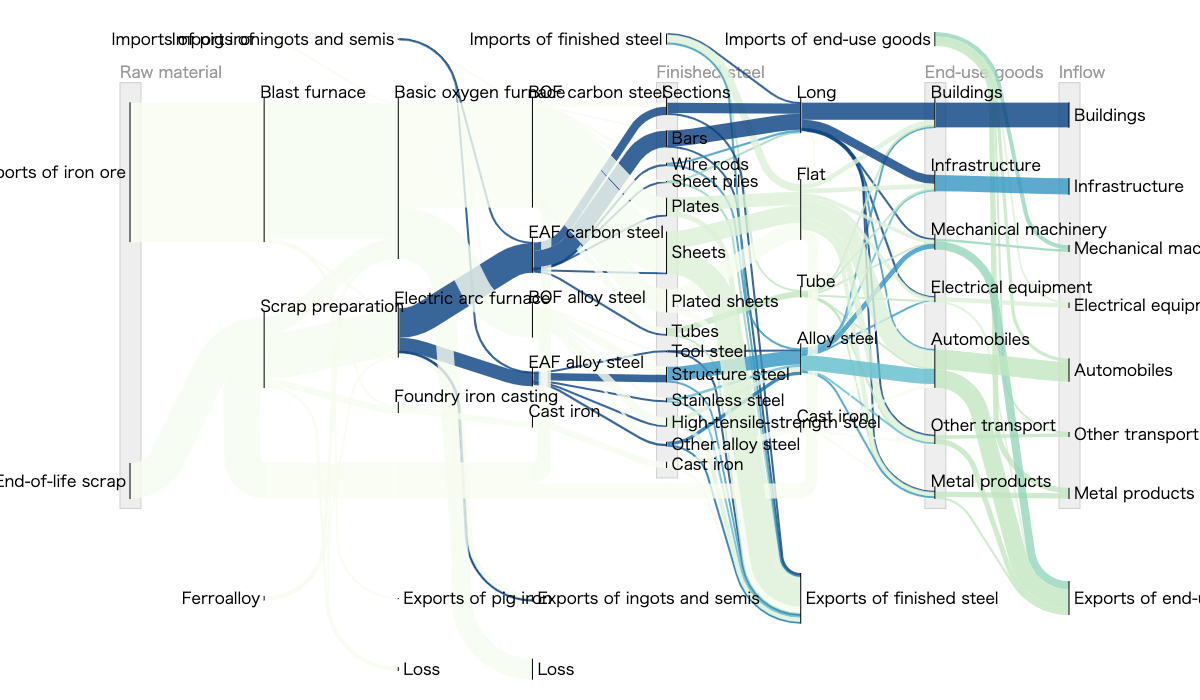